In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mnist_train.csv')

digit_3 = df[df['label'] == 3]
digit_3_sample = digit_3.sample(n=2000, random_state=42)
X_raw = digit_3_sample.drop(columns=['label']).values  # Shape: (2000, 784)

# Data matrix shape: (784, 2000)
X = X_raw.T
mu_x = np.mean(X, axis=1, keepdims=True)

# Center the data
X_centered = X - mu_x

print(f"Shape of centered X: {X_centered.shape}")  # Should be (784, 2000)

Shape of centered X: (784, 2000)


(784,)


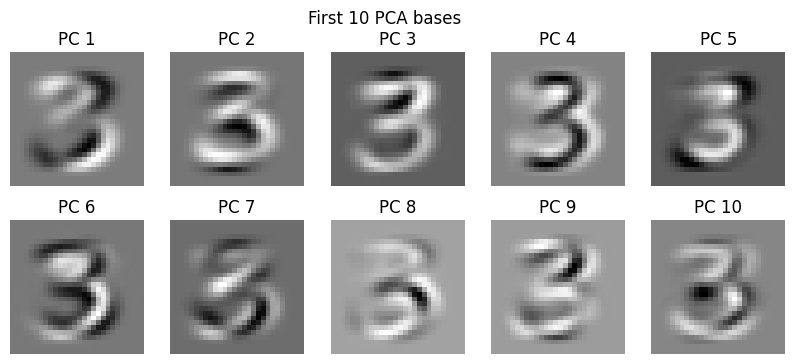

In [ ]:
# Covariance matrix of data matrix
cov_matrix = np.cov(X_centered)

# Eigen decomposition
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Show some PCA bases
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigvecs[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis('off')
plt.suptitle("First 10 PCA bases")
plt.show()

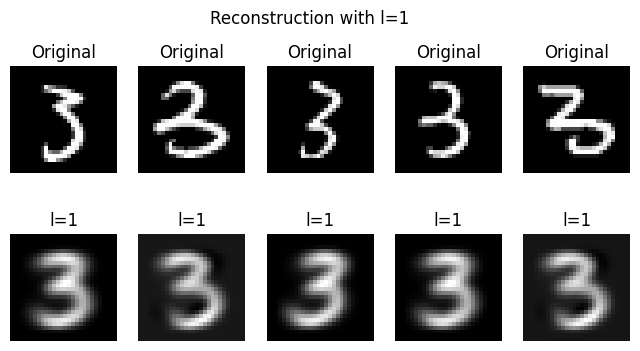

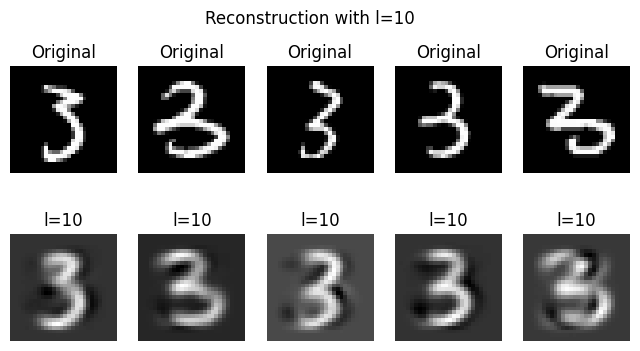

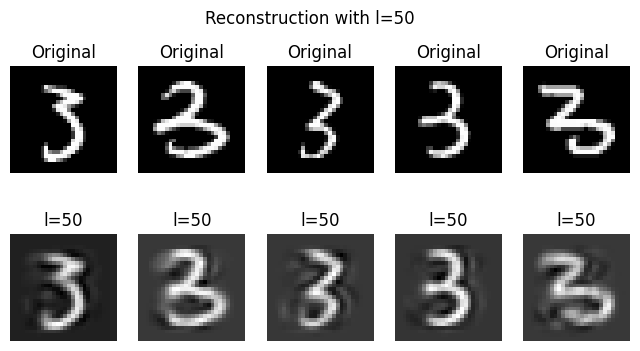

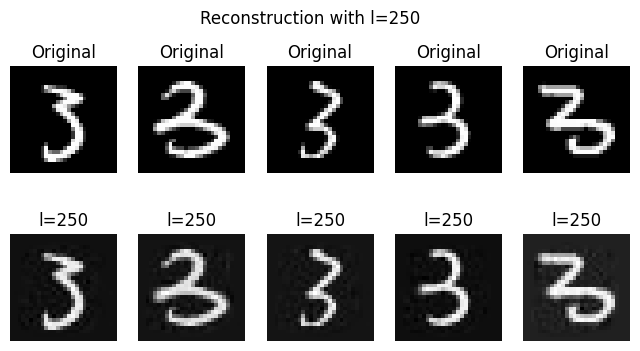

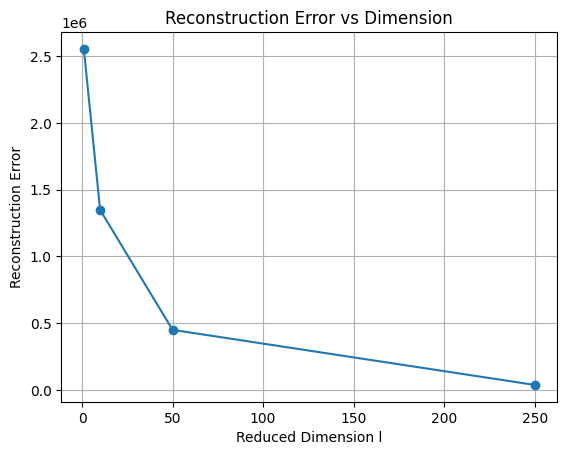

Dimension 1: Reconstruction Error = 2553468.63
Dimension 10: Reconstruction Error = 1348437.30
Dimension 50: Reconstruction Error = 450592.69
Dimension 250: Reconstruction Error = 38305.99


In [5]:
# (c) Reconstruction and Error Calculation
dimensions = [1, 10, 50, 250]
errors = []

for l in dimensions:
    W_l = eigvecs[:, :l]  # Take first l eigenvectors
    # Project
    Z = W_l.T @ X_centered
    # Reconstruct
    X_hat = (W_l @ Z) + mu_x

    # Compute reconstruction error
    error = np.mean(np.linalg.norm(X - X_hat, axis=0)**2)
    errors.append(error)

    # Show reconstruction of some examples
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[:, i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(2, 5, i + 6)
        plt.imshow(X_hat[:, i].reshape(28, 28), cmap='gray')
        plt.title(f"l={l}")
        plt.axis('off')
    plt.suptitle(f"Reconstruction with l={l}")
    plt.show()

# Plot reconstruction error
plt.figure()
plt.plot(dimensions, errors, marker='o')
plt.xlabel('Reduced Dimension l')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Dimension')
plt.grid(True)
plt.show()

# Print the errors
for l, err in zip(dimensions, errors):
    print(f"Dimension {l}: Reconstruction Error = {err:.2f}")